# WeatherPy
----

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from citipy import citipy

from api_JAK import api_key

# CSV with collected data
output_data_file = 'output_data/cities.csv'

# Set range of potential latitudes and longitudes
lat_set = (-90, 90)
long_set = (-180, 180)

## Generate Cities List

In [2]:
# List for holding coordinates and cities
lat_longs = []
cities = []
search_cities = []
countries = []

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
#                                                                   #
#       UPDATE COORDINATE COUNT (2000) BEFORE SUBMITTING!           #
#                                                                   #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 


# Create a set (min 500) of random coordinates
lats = np.random.uniform(low = -90.0000, high = 90.0000, size = 25)
longs = np.random.uniform(low = -180.0000, high = 180.0000, size = 25)
lat_longs = zip(lats, longs)

# Identify nearest city for each set of coordinates, add only if not already in list
for lat_long in lat_longs:
    city_name = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    country_code = citipy.nearest_city(lat_long[0], lat_long[1]).country_code
    if city_name not in cities:
        cities.append(city_name)
        countries.append(country_code)

# fill the space in multi-word city names (so the API pulls correctly)
for city in cities:
        readble_city = city.replace(' ', '+')
        search_cities.append(readble_city)

search_list = list(zip(search_cities, countries))

# Print the city count to confirm sufficient count
print(f'{len(cities)}\n{len(countries)}\n\n{cities}\n\n{countries}\n\n{search_list}')

# if cities list has cities with a space in the name, 
# the search_list item needs to replace the space with '%20' so the web address will search for correct city

23
23

['avarua', 'cherskiy', 'atar', 'port elizabeth', 'tsiroanomandidy', 'albany', 'lac du bonnet', 'rikitea', 'westport', 'mys shmidta', 'airai', 'georgetown', 'novobirilyussy', 'northam', 'saint-philippe', 'fortuna', 'turbat', 'hyeres', 'katsuura', 'ushuaia', 'mataura', 'jamestown', 'kapaa']

['ck', 'ru', 'mr', 'za', 'mg', 'au', 'ca', 'pf', 'ie', 'ru', 'pw', 'sh', 'ru', 'au', 're', 'us', 'pk', 'fr', 'jp', 'ar', 'pf', 'sh', 'us']

[('avarua', 'ck'), ('cherskiy', 'ru'), ('atar', 'mr'), ('port+elizabeth', 'za'), ('tsiroanomandidy', 'mg'), ('albany', 'au'), ('lac+du+bonnet', 'ca'), ('rikitea', 'pf'), ('westport', 'ie'), ('mys+shmidta', 'ru'), ('airai', 'pw'), ('georgetown', 'sh'), ('novobirilyussy', 'ru'), ('northam', 'au'), ('saint-philippe', 're'), ('fortuna', 'us'), ('turbat', 'pk'), ('hyeres', 'fr'), ('katsuura', 'jp'), ('ushuaia', 'ar'), ('mataura', 'pf'), ('jamestown', 'sh'), ('kapaa', 'us')]


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# define url for calls
url = 'http://api.openweathermap.org/data/2.5/weather?appid='
## test city_url
# city_url = url + api_key + '&units=imperial&q=' + city_name + ',' + country_code

## IN CASE I NEED THIS DIFFERENTLY, IT CAN BE ALTERNATIVELY WRITTEN
# units = 'imperial'
# city_url = weather_url + 'appid=' + api_key + '&units=' + units + '&q=' + city + ',' + country
# response = requests.get(city_url)
# weather_data = response.json() 

## test URL retrieval
# print(response.url)

## test dumps for reading json retrieval
# print(json.dumps(weather_data, indent=4, sort_keys=True))

In [4]:
city_cap = [] # duplicates info from cities variable in use, but in a cleaner format (proper capitalization)
country_cap = [] # duplicates info from countries variable in use, but in a cleaner format (proper capitalization)
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
failure_count = []

call_count = 0

print('Processing Records\n=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')

for call_count in range(len(search_list)):
    try:
        city_url = url + api_key + '&units=imperial&q=' + search_list[call_count][0] + ',' + search_list[call_count][1]
        weather_data = requests.get(city_url).json() 

        if weather_data["cod"] == '404':
            call_count += 1
            failure_count.append(f'City Call {call_count}')
            print(f'City Call {call_count}: ***** FAILED: City Not Found *****')
        else:
            city_cap.append(weather_data["name"])
            city_log = weather_data["name"]
            country_cap.append(weather_data["sys"]["country"])
            country_log = weather_data["sys"]["country"]
            lat.append(weather_data["coord"]["lat"])
            temp.append(weather_data["main"]["temp_max"])
            humidity.append(weather_data["main"]["humidity"])
            cloudiness.append(weather_data["clouds"]["all"])
            wind_speed.append(weather_data["wind"]["speed"])
            date.append(weather_data["dt"])

            print(f'City Call {call_count + 1}:  {city_log}, {country_log}')

        print(city_url)
        call_count += 1

    except:
        print('= + = + = + = + = + = +     ERROR     + = + = + = + = + = + =')
    continue

Processing Records
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
City Call 1:  Avarua, CK
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=avarua,ck
City Call 2:  Cherskiy, RU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=cherskiy,ru
City Call 3:  Atar, MR
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=atar,mr
City Call 4:  Port Elizabeth, ZA
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=port+elizabeth,za
City Call 5:  Tsiroanomandidy, MG
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=tsiroanomandidy,mg
City Call 6:  Albany, AU
http://api.openweathermap.org/data/2.5/weather?appid=d029dabe0c1f5dcdb74ffea87b5f47a3&units=imperial&q=albany,au
City Call 7:  Lac du Bonnet, CA
http://api.openweathermap.org/data/2.5/weather?appid=

In [5]:
# quick check of list data
print(f'{len(search_list)} random cities generated.\n')
print(f'{len(failure_count)} FAILURES:\n{failure_count}\n')
# print(failure_count)
print((f'''Complete data will have {len(search_list) - len(failure_count)} items.

Item Count:
{len(city_cap)}
{len(country_cap)}
{len(lat)}
{len(temp)}
{len(humidity)}
{len(cloudiness)}
{len(wind_speed)}
{len(date)}'''))

23 random cities generated.

3 FAILURES:
['City Call 10', 'City Call 11', 'City Call 21']

Complete data will have 20 items.

Item Count:
20
20
20
20
20
20
20
20


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_weather_df = (pd.DataFrame({'City': city_cap, 
                                 'Country': country_cap, 
                                 'Latitude': lat, 
                                 'Temperature (F)': temp, 
                                 'Humidity (%)': humidity, 
                                 'Cloudiness (%)': cloudiness, 
                                 'Wind Speed (mph)': wind_speed, 
                                 'Date': date}))
city_weather_df.head(50)

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Avarua,CK,-21.21,73.67,76,20,5.03,1562891968
1,Cherskiy,RU,68.75,76.73,42,100,5.01,1562891410
2,Atar,MR,20.52,88.07,24,61,4.03,1562891969
3,Port Elizabeth,ZA,-33.92,60.80,72,75,14.99,1562891312
4,Tsiroanomandidy,MG,-18.77,59.09,64,14,1.88,1562891969
5,Albany,AU,-35.02,50.00,100,40,3.36,1562891969
6,Lac du Bonnet,CA,50.25,82.00,59,67,3.00,1562891970
7,Rikitea,PF,-23.12,73.49,80,45,15.93,1562891327
8,Westport,IE,53.80,59.00,92,100,1.99,1562891970
9,Georgetown,SH,-7.93,75.83,73,42,16.51,1562891970


In [7]:
city_weather_df.count()

City                20
Country             20
Latitude            20
Temperature (F)     20
Humidity (%)        20
Cloudiness (%)      20
Wind Speed (mph)    20
Date                20
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

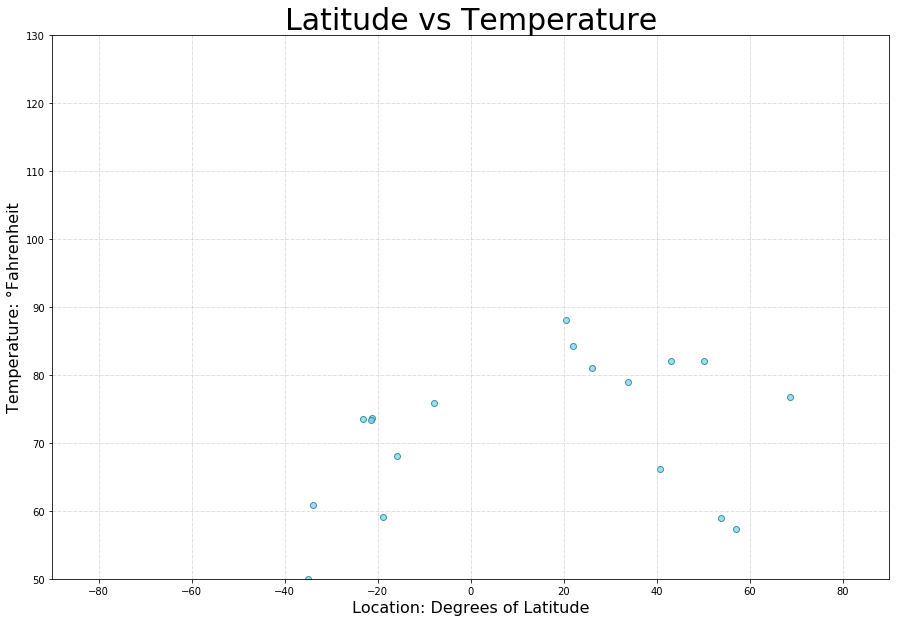

In [21]:
plt.figure(figsize = (15, 10))

plt.scatter(city_weather_df['Latitude'], city_weather_df['Temperature (F)'], 
            marker = 'o', 
            color = 'skyblue', 
            edgecolor = 'teal', 
            alpha = 0.75)

# Title the plot.
plt.title('Latitude vs Temperature', fontsize = 30)

# Label and limits for x-axis.
plt.xlabel('Location: Degrees of Latitude', fontsize = 16)
plt.xlim (-90, 90)

# Label and limits for y-axis.
plt.ylabel('Temperature: °Fahrenheit', fontsize = 16)
plt.ylim (50, 130)

# Add light grid.
plt.grid(color = 'silver', linestyle = '-.', linewidth = 0.5)

plt.show()

#### Latitude vs. Humidity Plot

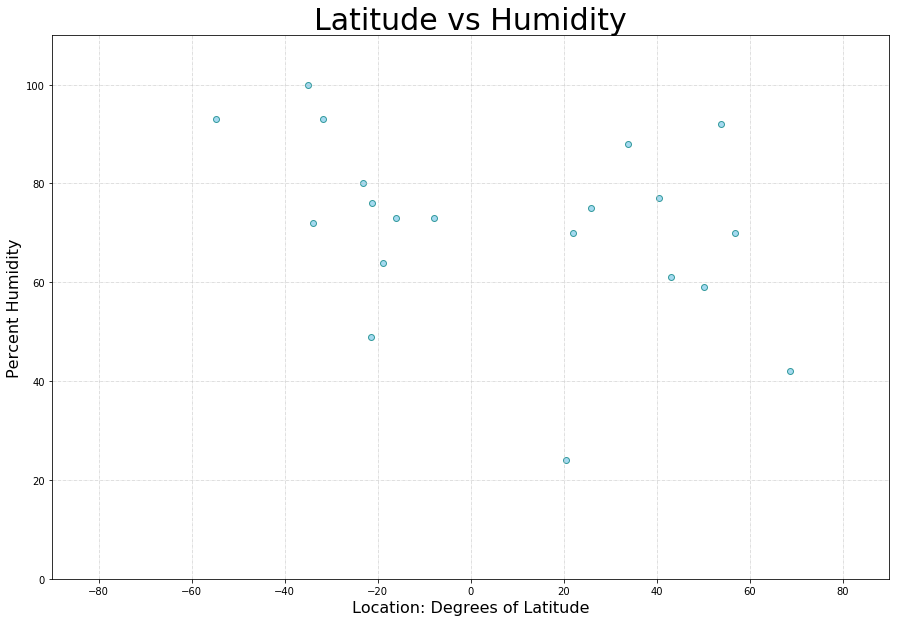

In [20]:
plt.figure(figsize = (15, 10))

plt.scatter(city_weather_df['Latitude'], city_weather_df['Humidity (%)'], 
            marker = 'o', 
            color = 'skyblue', 
            edgecolor = 'teal', 
            alpha = 0.75)

# Title the plot.
plt.title('Latitude vs Humidity', fontsize = 30)

# Label and limits for x-axis.
plt.xlabel('Location: Degrees of Latitude', fontsize = 16)
plt.xlim (-90, 90)

# Label and limits for y-axis.
plt.ylabel('Percent Humidity', fontsize = 16)
plt.ylim (0, 110)

# Add light grid.
plt.grid(color = 'silver', linestyle = '-.', linewidth = 0.5)

plt.show()

#### Latitude vs. Cloudiness Plot

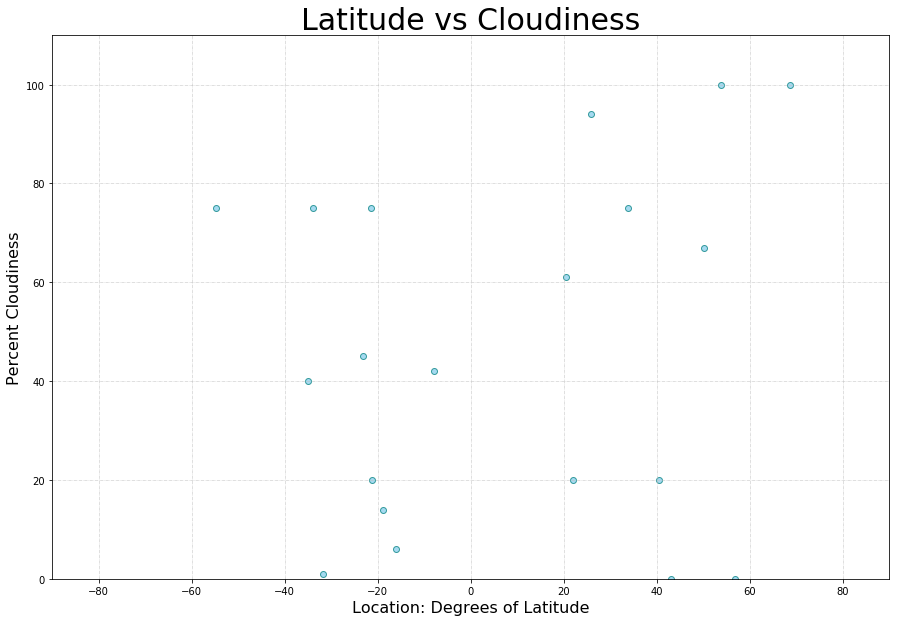

In [18]:
plt.figure(figsize = (15, 10))

plt.scatter(city_weather_df['Latitude'], city_weather_df['Cloudiness (%)'], 
            marker = 'o', 
            color = 'skyblue', 
            edgecolor = 'teal', 
            alpha = 0.75)

# Title the plot.
plt.title('Latitude vs Cloudiness', fontsize = 30)

# Label and limits for x-axis.
plt.xlabel('Location: Degrees of Latitude', fontsize = 16)
plt.xlim (-90, 90)

# Label and limits for y-axis.
plt.ylabel('Percent Cloudiness', fontsize = 16)
plt.ylim (0, 110)

# Add light grid.
plt.grid(color = 'silver', linestyle = '-.', linewidth = 0.5)

plt.show()

#### Latitude vs. Wind Speed Plot

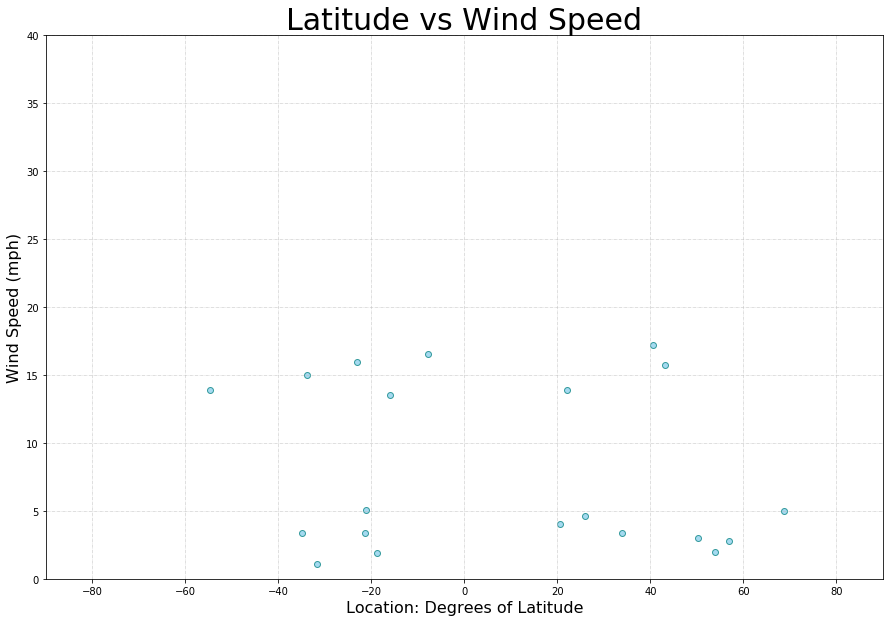

In [19]:
plt.figure(figsize = (15, 10))

plt.scatter(city_weather_df['Latitude'], city_weather_df['Wind Speed (mph)'], 
            marker = 'o', 
            color = 'skyblue', 
            edgecolor = 'teal', 
            alpha = 0.75)

# Title the plot.
plt.title('Latitude vs Wind Speed', fontsize = 30)

# Label and limits for x-axis.
plt.xlabel('Location: Degrees of Latitude', fontsize = 16)
plt.xlim (-90, 90)

# Label and limits for y-axis.
plt.ylabel('Wind Speed (mph)', fontsize = 16)
plt.ylim (0, 40)

# Add light grid.
plt.grid(color = 'silver', linestyle = '-.', linewidth = 0.5)

plt.show()